In [ ]:
# Deep Learning Project: Pet Classifier using CNN

Prepration
- Extract the ipynb file and the data in the same folder

Data Set
- A production grade program as 10,000 training images
- This is a small program with 20 images of cats and 20 images of dogs. 
- The evaluation set has 10 images of cats and 10 images of dogs

Runs
- The student is expected to run the 100-300 training step
- A production grade code would have about 20k-50k training steps

### Import modules

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import random
import sys

# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

### Set hyper parameters
- Run the program with three num_steps : 100,200,300

In [2]:
tf.reset_default_graph()
img_size = 32
num_channels = 3
img_size_flat = img_size * img_size * num_channels
img_shape = (img_size, img_size)
trainpath='C:/tensorflow/train'
testpath='C:/tensorflow/test'
labels = {'cats': 0, 'dogs': 1}
fc_size=32 #size of the output of final FC layer
num_steps=300 #Try 100, 200, 300. number of steps that training data should be looped. Usually 20K
tf.logging.set_verbosity(tf.logging.INFO)

In [3]:
### Read the image dataset

length of train image set 40
X_data shape: (40, 32, 32, 3)
y_data shape: (40,)


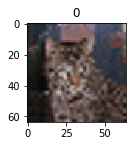

In [4]:
def read_images_classes(basepath,imgSize=img_size):
    image_stack = []
    label_stack = []

    for counter, l in enumerate(labels):
        path = os.path.join(basepath, l,'*g')
        for img in glob.glob(path):
            one_hot_vector =np.zeros(len(labels),dtype=np.int16)
            one_hot_vector[counter]=1
            image = cv2.imread(img)
            im_resize = cv2.resize(image,img_shape, interpolation=cv2.INTER_CUBIC)
            image_stack.append(im_resize)
            label_stack.append(labels[l])            
    return np.array(image_stack), np.array(label_stack)

X_train, y_train=read_images_classes(trainpath)
X_test, y_test=read_images_classes(testpath)

#test a sample image
print('length of train image set',len(X_train))
print('X_data shape:', X_train.shape)
print('y_data shape:', y_train.shape)

fig1 = plt.figure() 
ax1 = fig1.add_subplot(2,2,1) 
img = cv2.resize(X_train[0],(64,64), interpolation=cv2.INTER_CUBIC)
ax1.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title(y_train[0])
plt.show()

### Assignment: Define the tensorflow model

The model should have the following layers
- input later
- conv layer 1 with 32 filters of kernel  size[5,5],
- pooling layer 1 with pool size[2,2] and stride 2
- conv layer 2 with 64 filters of kernel  size[5,5],
- pooling layer 2 with pool size[2,2] and stride 2
- dense layer whose output size is fixed in the hyper parameter: fc_size=32
- drop out layer with droput probability 0.4
- predict the class by doing a softmax on the output of the dropout layers

Training
- For training fefine the loss function and minimize it
- For evaluation calculate the accuracy

Reading Material
- For ideas look at tensorflow layers tutorial

### The cnn_model_fn has to be defined here by the student

In [5]:
def cnn_model_fn(features, labels, mode):

# Input Layer
    input_layer = tf.reshape(features["image"], [-1, _DEFAULT_IMAGE_SIZE, _DEFAULT_IMAGE_SIZE, 3])
 
    # Convolutional Layer #1
    conv1 = tf.layers.conv2d(
        inputs=input_layer,
        filters=32,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
 
    # Pooling Layer #1
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2)
 
    # Convolutional Layer #2 and Pooling Layer #2
    conv2 = tf.layers.conv2d(
        inputs=pool1,
        filters=64,
        kernel_size=[5, 5],
        padding="same",
        activation=tf.nn.relu)
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2)
 
    # Dense Layer
    pool2_flat = tf.reshape(pool2, [-1, 126 * 126 * 32])
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu)
    dropout = tf.layers.dropout(
        inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)
 
    # Logits Layer
    logits = tf.layers.dense(inputs=dropout, units=2)

### Run the tensorflow model

This section will use the model defined by the student and run the training and evaluation step

In [6]:
def cnn_model_fn(features, labels, mode):
    
    predictions = {
        "classes": tf.argmax(input=logits, axis=1),
        # softmax for prediction 
        "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }
 
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)
    

def one_hot_encode(x):
    
    lb.fit(x)
    lb.classes_ = list(range(0, 1))
    return lb.transform(x)

In [7]:
# defining the loss function. 
tf.reset_default_graph()
   
 loss = tf.losses.softmax_cross_entropy(
            onehot_labels=onehot_labels,logits=logits)

  optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=0.001)
                          
  train_op = optimizer.minimize(loss=cost)

  init_op = tf.global_variables_initializer()


IndentationError: unexpected indent (<ipython-input-7-c0461f5330f9>, line 4)

In [8]:
if mode == tf.estimator.ModeKeys.TRAIN:
   optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
   train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

IndentationError: unexpected indent (<ipython-input-8-70aff7fdde26>, line 6)

In [36]:
 eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

IndentationError: unexpected indent (<ipython-input-36-4b72483da3a2>, line 4)

In [37]:
#X_train = np.array((X_train/255.0),dtype=np.float16)
#X_test = np.array((X_test/255.0), dtype=np.float16)
X_train = np.array((X_train/255.0),dtype=np.float32)
X_test = np.array((X_test/255.0), dtype=np.float32)

pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/pets_convnet_model")
#pets_classifier = tf.estimator.Estimator(model_fn=cnn_model_fn)
tensors_to_log = {"probabilities": "softmax_tensor"}
logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_train}, y=y_train, batch_size=10,
                                                      num_epochs=None, shuffle=True)
pets_classifier.train(input_fn=train_input_fn, steps=num_steps, hooks=[logging_hook])
eval_input_fn = tf.estimator.inputs.numpy_input_fn(x={"x": X_test}, y=y_test, num_epochs=1,shuffle=False)
eval_results = pets_classifier.evaluate(input_fn=eval_input_fn)
print(eval_results)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/pets_convnet_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000040055AD4A8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.


NameError: name 'logits' is not defined

In [97]:
#Calculate Loss (for both TRAIN and EVAL modes)
onehot_labels = tf.one_hot(indices=tf.cast(labels,tf.type=int32, depth=2)
loss = tf.losses.softmax_cross_entropy(onehot_labels=onehot_labels, logits=logits)

SyntaxError: invalid syntax (<ipython-input-97-c6086bd0bd4f>, line 3)

In [ ]:
 if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optimizer.minimize(
            loss=loss,
            global_step=tf.train.get_global_step())
    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

In [ ]:
eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(
            labels=labels, predictions=predictions["classes"])}
    return tf.estimator.EstimatorSpec(
        mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [ ]:
def get_file_lists(data_dir):
    import glob
 
    train_list = glob.glob(data_dir + '/' + 'train-*')
    valid_list = glob.glob(data_dir + '/' + 'validation-*')
    if len(train_list) == 0 and \
                    len(valid_list) == 0:
        raise IOError('No files found at specified path!')
    return train_list, valid_list
 
def parse_record(raw_record, is_training):
    """Parse an ImageNet record from `value`."""
    keys_to_features = {
        'image/encoded':
            tf.FixedLenFeature((), tf.string, default_value=''),
        'image/format':
            tf.FixedLenFeature((), tf.string, default_value='jpeg'),
        'image/class/label':
            tf.FixedLenFeature([], dtype=tf.int64, default_value=-1),
        'image/class/text':
            tf.FixedLenFeature([], dtype=tf.string, default_value=''),
    }
 
    parsed = tf.parse_single_example(raw_record, keys_to_features)
 
    image = tf.image.decode_image(
        tf.reshape(parsed['image/encoded'], shape=[]),
        _NUM_CHANNELS)
 
    # Note that tf.image.convert_image_dtype scales the image data to [0, 1).
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
 
    image = vgg_preprocessing.preprocess_image(
        image=image,
        output_height=_DEFAULT_IMAGE_SIZE,
        output_width=_DEFAULT_IMAGE_SIZE,
        is_training=is_training)
 
    label = tf.cast(
        tf.reshape(parsed['image/class/label'], shape=[]),
        dtype=tf.int32)
 
    return {"image": image}, label

In [ ]:
def input_fn(is_training, filenames, batch_size, num_epochs=1, num_parallel_calls=1):
    dataset = tf.data.TFRecordDataset(filenames)
 
    if is_training:
        dataset = dataset.shuffle(buffer_size=1500)
 
    dataset = dataset.map(lambda value: parse_record(value, is_training),
                          num_parallel_calls=num_parallel_calls)
    dataset = dataset.shuffle(buffer_size=10000)
    dataset = dataset.batch(batch_size)
    dataset = dataset.repeat(num_epochs)
    iterator = dataset.make_one_shot_iterator()
 
    features, labels = iterator.get_next()
 
    return features, labels
 
 
def train_input_fn(file_path):
    return input_fn(True, file_path, 100, None, 10)
 
 
def validation_input_fn(file_path):
    return input_fn(False, file_path, 50, 1, 1)

In [ ]:
classifier = tf.estimator.Estimator(model_fn=cnn_model_fn, model_dir="/tmp/convnet_model")

In [ ]:
# Set up logging for predictions
  tensors_to_log = {"probabilities": "softmax_tensor"}
  logging_hook = tf.train.LoggingTensorHook(tensors=tensors_to_log, every_n_iter=50)

In [ ]:
classifier.train(input_fn=lambda: train_input_fn(train_list), steps=10, hooks=[logging_hook])

In [ ]:
def label_image(img):
    img_name = img.split(".")[-3]
    if img_name == "cat":
        return [1,0]
    elif img_name == "dog":
        return [0,1]

#This Function will Return a Vector for the labels of the Data